# Volatility prediction

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
close_df = pd.read_csv('../../db/data/merge/primary/closes.csv', index_col=0)
high_df = pd.read_csv('../../db/data/merge/primary/highs.csv', index_col=0)
low_df = pd.read_csv('../../db/data/merge/primary/lows.csv', index_col=0)
close_df.shape, high_df.shape, low_df.shape

((112341, 28), (112341, 28), (112341, 28))

In [6]:
def ema(df: pd.Series, window: int):
    return df.ewm(alpha=1/window, adjust=False).mean()

In [7]:
def atr(close: pd.DataFrame, low: pd.DataFrame, high: pd.DataFrame, window:int=14):
    data = pd.DataFrame([])
    ccy_pairs = close.columns
    for pair in ccy_pairs:
        data[f'close_{pair}'] = close[pair]
        data[f'high_{pair}'] = high[pair]
        data[f'low_{pair}'] = low[pair]
        data[f'tr0_{pair}'] = data[f'high_{pair}'] - data[f'low_{pair}']
        data[f'tr1_{pair}'] = np.abs(data[f'high_{pair}'] - data[f'close_{pair}'].shift())
        data[f'tr2_{pair}'] = np.abs(data[f'low_{pair}'] - data[f'close_{pair}'].shift())
        data[f'tr_{pair}'] = data[[f'tr0_{pair}', f'tr1_{pair}', f'tr2_{pair}']].max(axis=1)
        data[f'atr_{pair}'] = ema(data[f'tr_{pair}'], window)
    data.dropna(inplace=True)
    return data

In [8]:
df = atr(close_df.iloc[:5000], low_df.iloc[:5000], high_df.iloc[:5000])
df

,close_AUD_CAD,high_AUD_CAD,low_AUD_CAD,tr0_AUD_CAD,tr1_AUD_CAD,tr2_AUD_CAD,tr_AUD_CAD,atr_AUD_CAD,close_AUD_CHF,high_AUD_CHF,...,tr_USD_CHF,atr_USD_CHF,close_USD_JPY,high_USD_JPY,low_USD_JPY,tr0_USD_JPY,tr1_USD_JPY,tr2_USD_JPY,tr_USD_JPY,atr_USD_JPY
2005-01-02T18:00:00.000000000Z,0.94353,0.94353,0.93884,0.00469,0.00000,0.00469,0.00469,0.004690,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
2005-01-02T19:00:00.000000000Z,0.94460,0.94460,0.94291,0.00169,0.00107,0.00062,0.00169,0.004476,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
2005-01-02T20:00:00.000000000Z,0.93910,0.94433,0.93813,0.00620,0.00027,0.00647,0.00647,0.004618,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
2005-01-02T21:00:00.000000000Z,0.93858,0.93936,0.93822,0.00114,0.00026,0.00088,0.00114,0.004370,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
2005-01-02T22:00:00.000000000Z,0.94007,0.94007,0.93813,0.00194,0.00149,0.00045,0.00194,0.004196,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-10-10T11:00:00.000000000Z,0.89210,0.89306,0.89170,0.00136,0.00024,0.00112,0.00136,0.001587,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
2005-10-10T12:00:00.000000000Z,0.89138,0.89234,0.89099,0.00135,0.00024,0.00111,0.00135,0.001570,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
2005-10-10T13:00:00.000000000Z,0.89051,0.89186,0.89051,0.00135,0.00048,0.00087,0.00135,0.001554,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22
2005-10-10T14:00:00.000000000Z,0.88948,0.89099,0.88854,0.00245,0.00048,0.00197,0.00245,0.001618,0.96288,0.96492,...,0.0012,0.0012,117.75,117.95,117.73,0.22,0.2,0.02,0.22,0.22


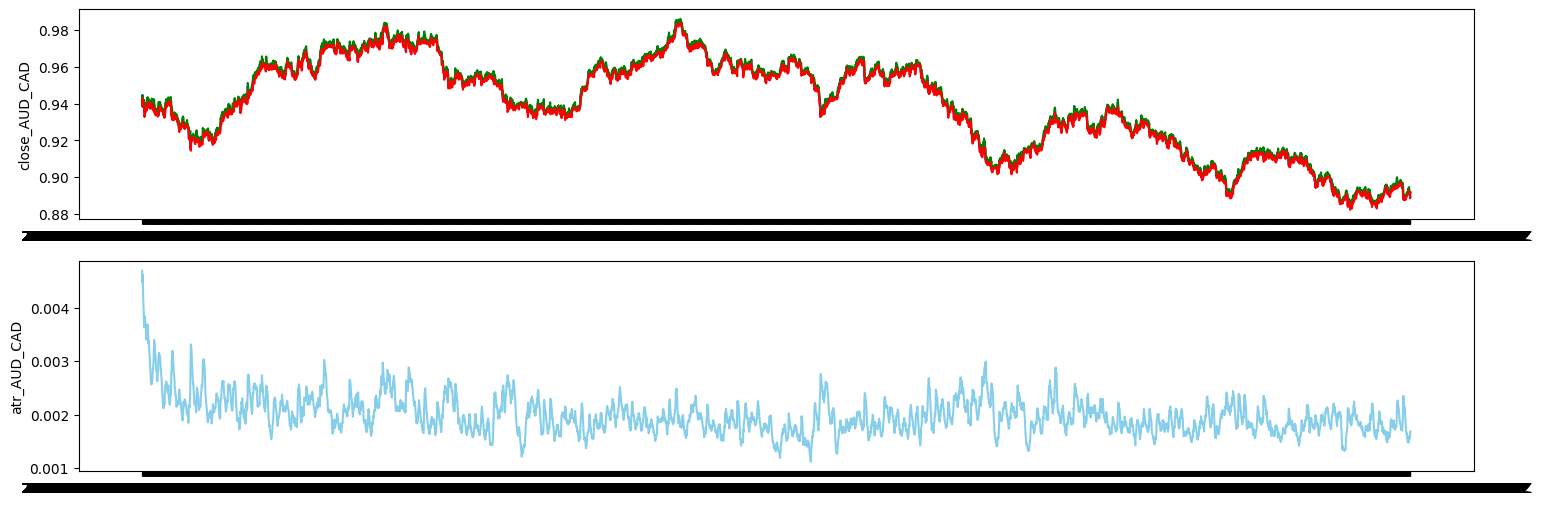

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(2, 1, 1)
sns.lineplot(data=df['close_AUD_CAD'], color='b')
sns.lineplot(data=df['high_AUD_CAD'], color='g')
sns.lineplot(data=df['low_AUD_CAD'], color='r');
plt.subplot(2, 1, 2)
sns.lineplot(data=df['atr_AUD_CAD'], color='skyblue');

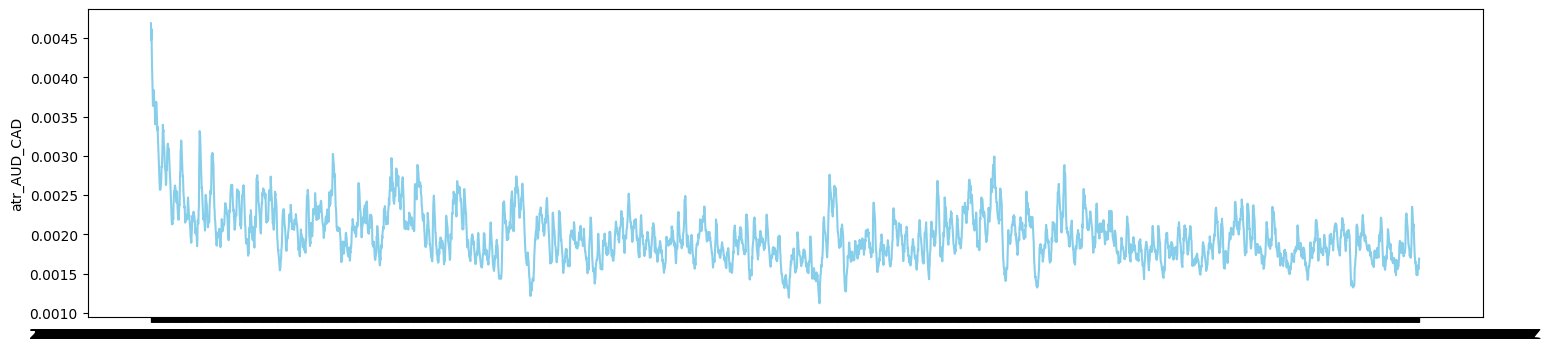

In [9]:
plt.figure(figsize=(18,4))
sns.lineplot(data=df['atr_AUD_CAD'], color='skyblue');